In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
column_names = [
    "animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator",
    "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "class_type"
]


data = pd.read_csv('zoo.data',names=column_names)
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [7]:
# Separate features and target variable
X = data.drop(columns=["class_type"])
y = data['class_type']

In [11]:
# Preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
X['animal_name'] = label_encoder.fit_transform(X["animal_name"])

In [12]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Define the Classification model
classification_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\NEW\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
## Train the model
history =classification_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.3844 - loss: -0.8851 - val_accuracy: 0.5714 - val_loss: -1.4576
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3258 - loss: -2.0723 - val_accuracy: 0.5714 - val_loss: -2.3254
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3688 - loss: -2.9935 - val_accuracy: 0.5714 - val_loss: -3.1995
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3531 - loss: -3.6383 - val_accuracy: 0.5714 - val_loss: -4.0936
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3414 - loss: -5.0464 - val_accuracy: 0.5714 - val_loss: -5.0006
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3492 - loss: -6.1731 - val_accuracy: 0.5714 - val_loss: -5.9747
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3883 - loss: -6.9853 - val_accuracy: 0.5714 - val_loss: -7.0251
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3453 - loss: -8.2101 - val_accuracy: 0.5

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3531 - loss: -516.8024 - val_accuracy: 0.5714 - val_loss: -438.4317
Epoch 51/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3766 - loss: -555.3994 - val_accuracy: 0.5714 - val_loss: -467.9135
Epoch 52/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3766 - loss: -629.7574 - val_accuracy: 0.5714 - val_loss: -499.2130
Epoch 53/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3492 - loss: -638.2493 - val_accuracy: 0.5714 - val_loss: -532.1638
Epoch 54/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3609 - loss: -697.0520 - val_accuracy: 0.5714 - val_loss: -567.0200
Epoch 55/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3609 - loss: -702.0065 - val_accuracy: 0.5714 - val_loss: -603.1149
Epoch 56/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3375 - loss: -725.7162 - val_accuracy: 0.5714 - val_loss: -641.2326
Epoch 57/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3531 - loss: -723

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3688 - loss: -4627.2354 - val_accuracy: 0.5714 - val_loss: -4148.8999
Epoch 99/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3297 - loss: -5177.6074 - val_accuracy: 0.5714 - val_loss: -4289.5757
Epoch 100/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3727 - loss: -5395.9697 - val_accuracy: 0.5714 - val_loss: -4434.4697


In [20]:
# Evaluate the model on the testing set
loss, accuracy = classification_model.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5714 - loss: -4434.4697
Classification Loss: -4434.4697265625
Classification Accuracy: 0.5714285969734192


In [28]:
# Generate ROC curve
y_pred_prob = classification_model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


ValueError: multiclass format is not supported

In [ ]:
# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

In [25]:
# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 1  0  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.57      1.00      0.73        12
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.57        21
   macro avg       0.10      0.17      0.12        21
weighted avg       0.33      0.57      0.42        21



C:\Users\NEW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NEW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NEW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))

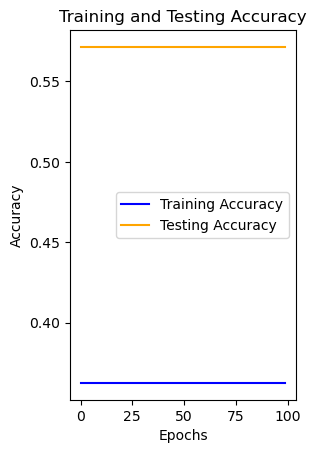

In [27]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

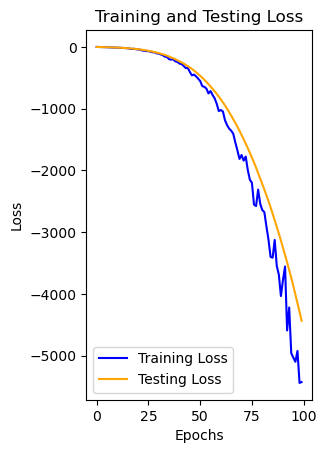

In [23]:
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [24]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>